## Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import matplotlib.pyplot as plt
from windrose import WindroseAxes


# Loading the data

In [2]:
import pandas as pd
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQZ3MwvxC6cEN8UP_hfYgBXbuS9RC0RlXCEgW6w0u8ospSiOktXWDi0H1GAjyGk1o_VrZGIKqZRY8Iy/pub?gid=1663887752&single=true&output=csv"
df=pd.read_csv(url)
print (df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 0:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 0:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 0:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 0:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 0:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# 1. Summary Statistics & Missing-Value Report

In [3]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 0:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 0:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 0:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 0:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 0:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 0:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [5]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
304688,2022-05-24 14:09,595.5,154.6,447.9,551.3,534.9,32.9,47.0,1.7,2.5,0.5,223.9,13.1,976,0,0.0,47.7,50.1,NaN
220790,2022-03-27 7:51,268.6,40.9,245.6,243.7,214.3,30.9,43.6,0.8,1.6,0.6,193.6,18.6,977,0,0.0,39.9,37.0,NaN
440102,2022-08-26 15:03,236.9,0.0,245.3,233.3,231.5,28.9,73.2,1.2,1.9,0.4,228.5,18.8,973,0,0.0,37.4,39.1,NaN
240565,2022-04-10 1:26,-2.1,0.0,0.0,0.0,0.0,29.8,56.8,5.2,6.9,0.8,221.0,13.1,972,0,0.0,29.7,29.2,NaN
236900,2022-04-07 12:21,980.0,689.3,279.3,919.0,910.0,37.7,38.9,2.4,3.6,0.8,261.4,28.3,973,0,0.0,62.9,67.7,NaN


In [ ]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

df['Comments'] = df['Comments'].astype('object')

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      0 non-null      object
 1   GHI            0 non-null      int64 
 2   DNI            0 non-null      int64 
 3   DHI            0 non-null      int64 
 4   ModA           0 non-null      int64 
 5   ModB           0 non-null      int64 
 6   Tamb           0 non-null      int64 
 7   RH             0 non-null      int64 
 8   WS             0 non-null      int64 
 9   WSgust         0 non-null      int64 
 10  WSstdev        0 non-null      int64 
 11  WD             0 non-null      int64 
 12  WDstdev        0 non-null      int64 
 13  BP             0 non-null      int64 
 14  Cleaning       0 non-null      int64 
 15  Precipitation  0 non-null      int64 
 16  TModA          0 non-null      int64 
 17  TModB          0 non-null      i

In [7]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [8]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000

Listing Columns with High Null Percentage

In [94]:


print("===== Summary Statistics =====")
print(df.describe(include='number'))  



missing_count = df.isna().sum()

print("\n===== Missing Values Per Column =====")
print(missing_count)

missing_pct = (df.isna().mean() * 100).round(2)
cols_over_5pct = missing_pct[missing_pct > 5]

print("\n===== Columns With >5% Missing Values =====")
if cols_over_5pct.empty:
    print("No columns have more than 5% missing data ✅")
else:
    print(cols_over_5pct)



missing_report = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_pct
}).sort_values(by="Missing %", ascending=False)

print("\n===== Full Missing-Value Report =====")
print(missing_report)



===== Summary Statistics =====
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25

In [9]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
              Timestamp
count            525600
unique           525600
top     2021-10-25 0:01
freq                  1


In [10]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
              Timestamp            GHI            DNI            DHI  \
count            525600  525600.000000  525600.000000  525600.000000   
unique           525600            NaN            NaN            NaN   
top     2021-10-25 0:01            NaN            NaN            NaN   
freq                  1            NaN            NaN            NaN   
mean                NaN     230.555040     151.258469     116.444352   
std                 NaN     322.532347     250.956962     156.520714   
min                 NaN     -12.700000       0.000000       0.000000   
25%                 NaN      -2.200000       0.000000       0.000000   
50%                 NaN       2.100000       0.000000       2.500000   
75%                 NaN     442.400000     246.400000     215.700000   
max                 NaN    1424.000000    1004.500000     805.700000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000

Look for missing values & outliers

In [41]:


df = pd.read_csv("../data/togo-dapaong_qc.csv")


key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


print("Missing values per column:")
print(df[key_cols].isna().sum())


print("\nSummary statistics:")
print(df[key_cols].describe())

# df = pd.read_csv("../data/togo-dapaong_qc.csv")

# num_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB','WSgust','WS']
# for col in num_cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce')
    
# z = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
# z_outliers_mask = (z > 3).any(axis=1)
# print("Z-score outlier rows:", int(z_outliers_mask.sum()))


Missing values per column:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB             WS         WSgust  
count  525600.000000  525600.000000  525600.000000  
mean      219.568588       2.368093       3.229490  
std       307.932510       1.462668       1.882565  
min         0.000000 

Compute Z-scores and flag rows with |Z| > 3

In [ ]:
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))

outliers = (z_scores > 3).any(axis=1)

# Display number of outliers
print(f"Outliers found: {outliers.sum()}")


outlier_rows = df[outliers]


Outliers found: 9251


Drop or impute missing values

In [100]:

df = pd.read_csv("../data/togo-dapaong_qc.csv")

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

if key_cols:
    df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))
    df.dropna(subset=key_cols, inplace=True)
else:
    print(" None of the expected key columns are in the dataset!")



Export cleaned DataFrame

In [58]:

import os
os.makedirs("data", exist_ok=True)


country = "togo-dapaong_qc"  
df.to_csv(f"../data/togo-dapaong_qc_clean.csv", index=False)

print(f"Cleaned data saved to data/togo-dapaong_qc_clean.csv")


Cleaned data saved to data/togo-dapaong_qc_clean.csv


Time Series Analysis

Columns available: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


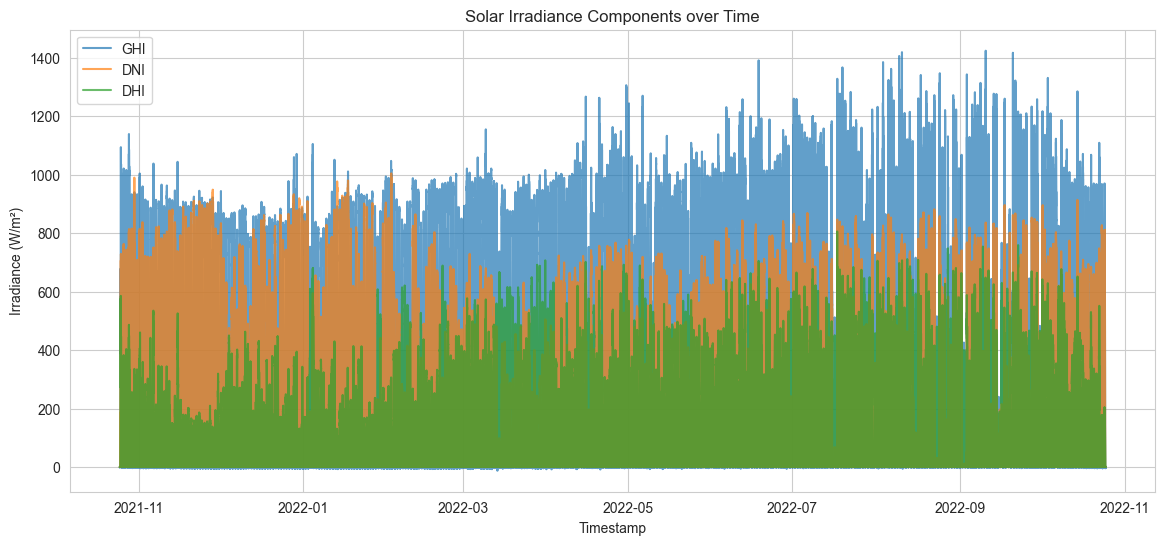

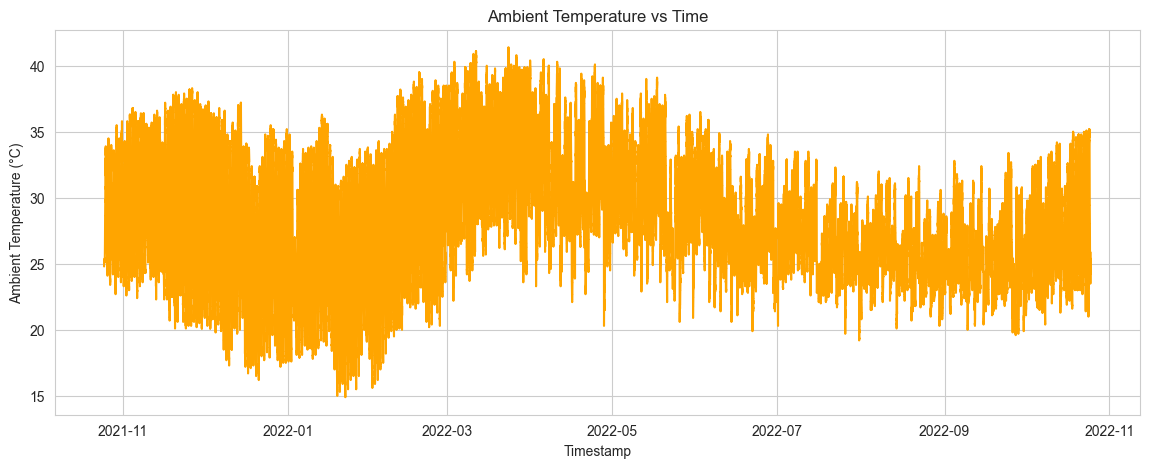

In [ ]:
#prepare data
df = pd.read_csv("../data/togo-dapaong_qc_clean.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
print("Columns available:", df.columns.tolist())


#Line chart of key GHI, DNI, DHI, Tamb vs. Timestamp.
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.title('Solar Irradiance Components over Time')
plt.legend()
plt.grid(True)
plt.show()


#Temperature (Tamb) trend

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Tamb'], color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Ambient Temperature vs Time')
plt.grid(True)
plt.show()



Monthly pattern analysis

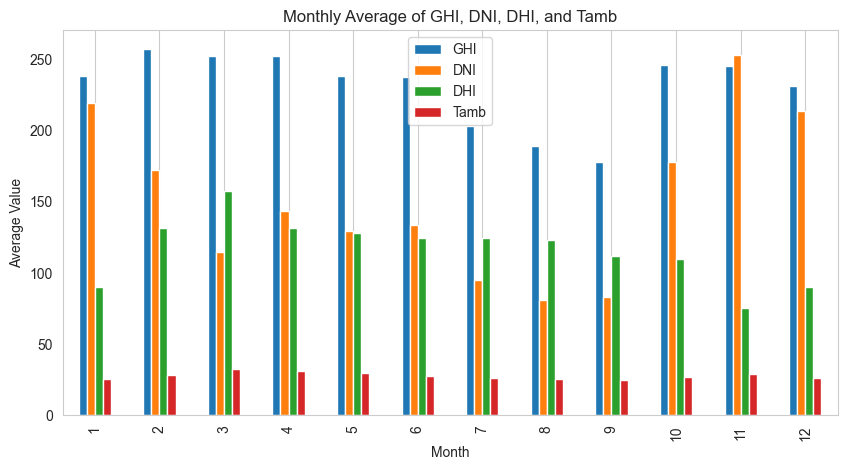

In [64]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('Average Value')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()


Daily pattern

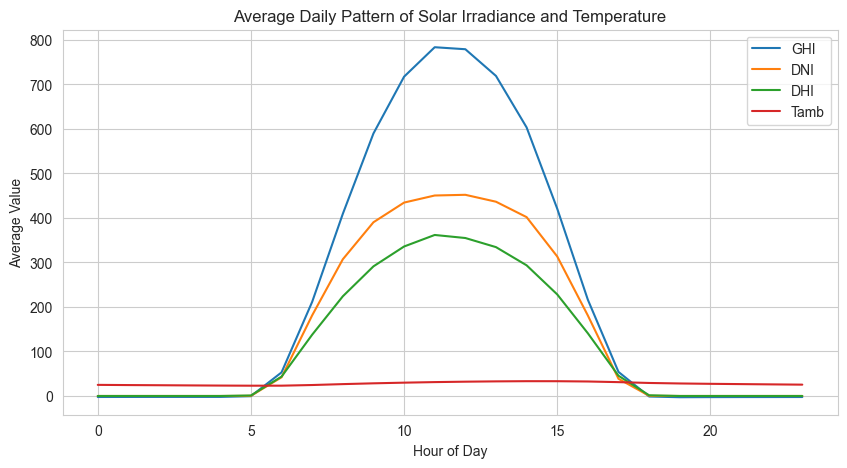

In [65]:
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(10, 5))
plt.title('Average Daily Pattern of Solar Irradiance and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()


Detect anomalies

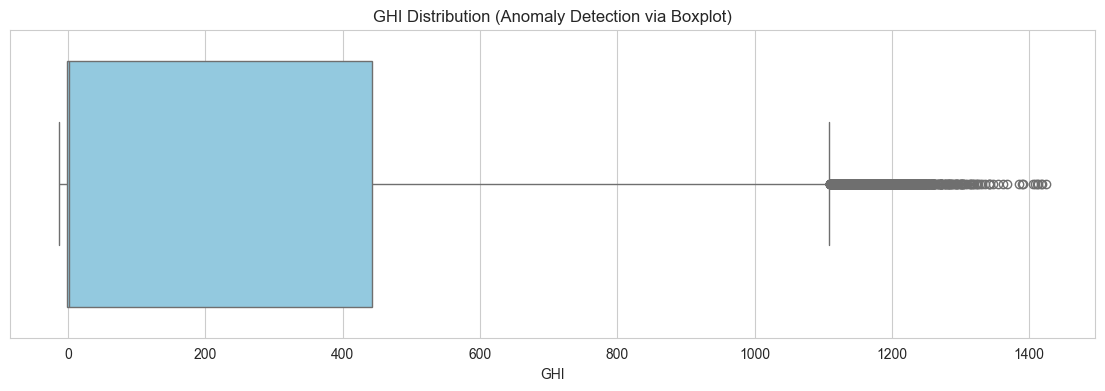

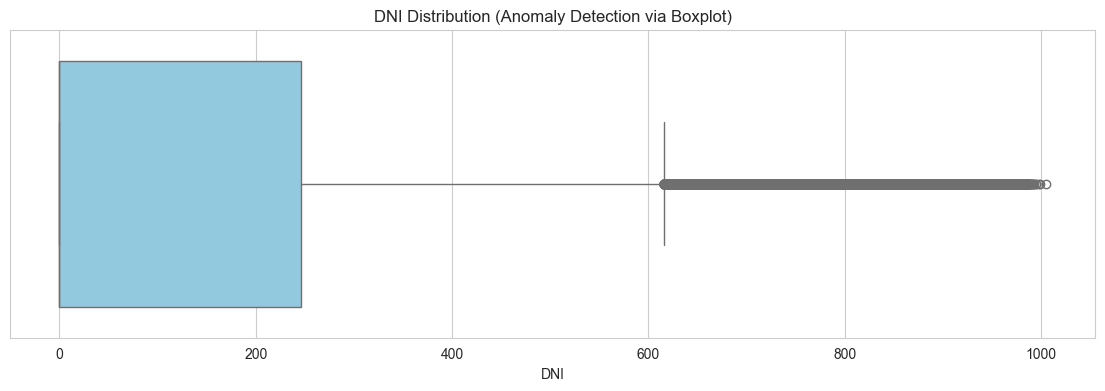

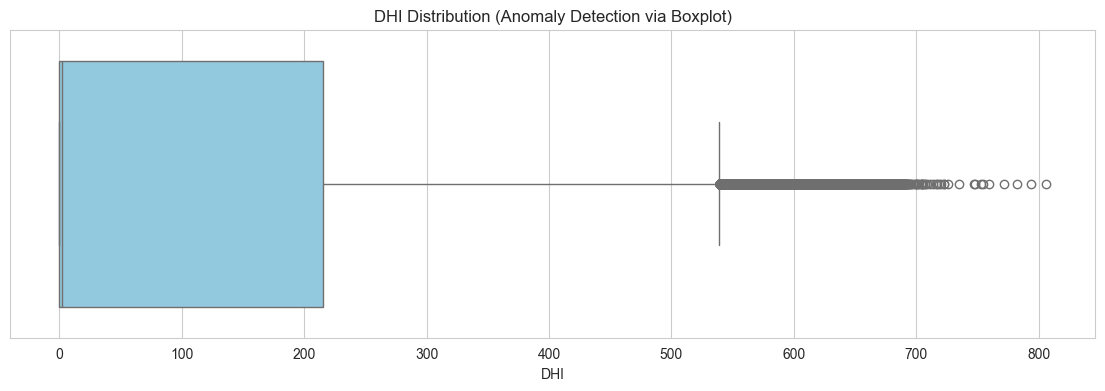

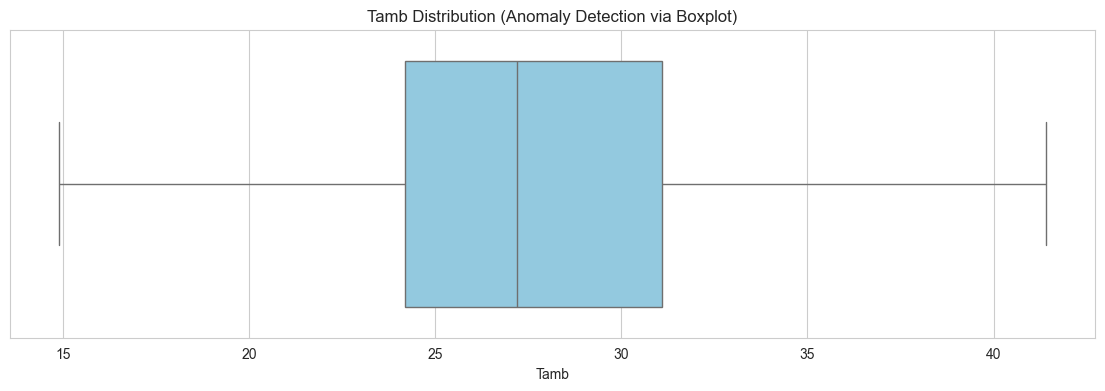

In [66]:
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.figure(figsize=(14, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col} Distribution (Anomaly Detection via Boxplot)')
    plt.show()


Cleaning Impact

BASIC DATA OVERVIEW
Dataset shape: (200, 5)

Data types:
Cleaning_flag     object
ModA_pre         float64
ModA_post        float64
ModB_pre         float64
ModB_post        float64
dtype: object

Missing values:
Cleaning_flag    0
ModA_pre         0
ModA_post        0
ModB_pre         0
ModB_post        0
dtype: int64

Basic statistics:
         ModA_pre   ModA_post    ModB_pre   ModB_post
count  200.000000  200.000000  200.000000  200.000000
mean   100.268449  110.426790   93.968286  105.789029
std     15.105120   11.314631   18.567589   13.316389
min     51.380990   82.376946   46.456040   75.852988
25%     89.213958  102.807447   81.213950   96.384727
50%    100.996322  110.201577   93.905020  105.406522
75%    109.415954  117.968194  105.297588  114.276583
max    157.790972  136.277635  150.419855  141.853349

CLEANING IMPACT ANALYSIS
Average metrics by cleaning status:
              ModA_pre              ModA_post              ModB_pre         \
                  mean    std coun

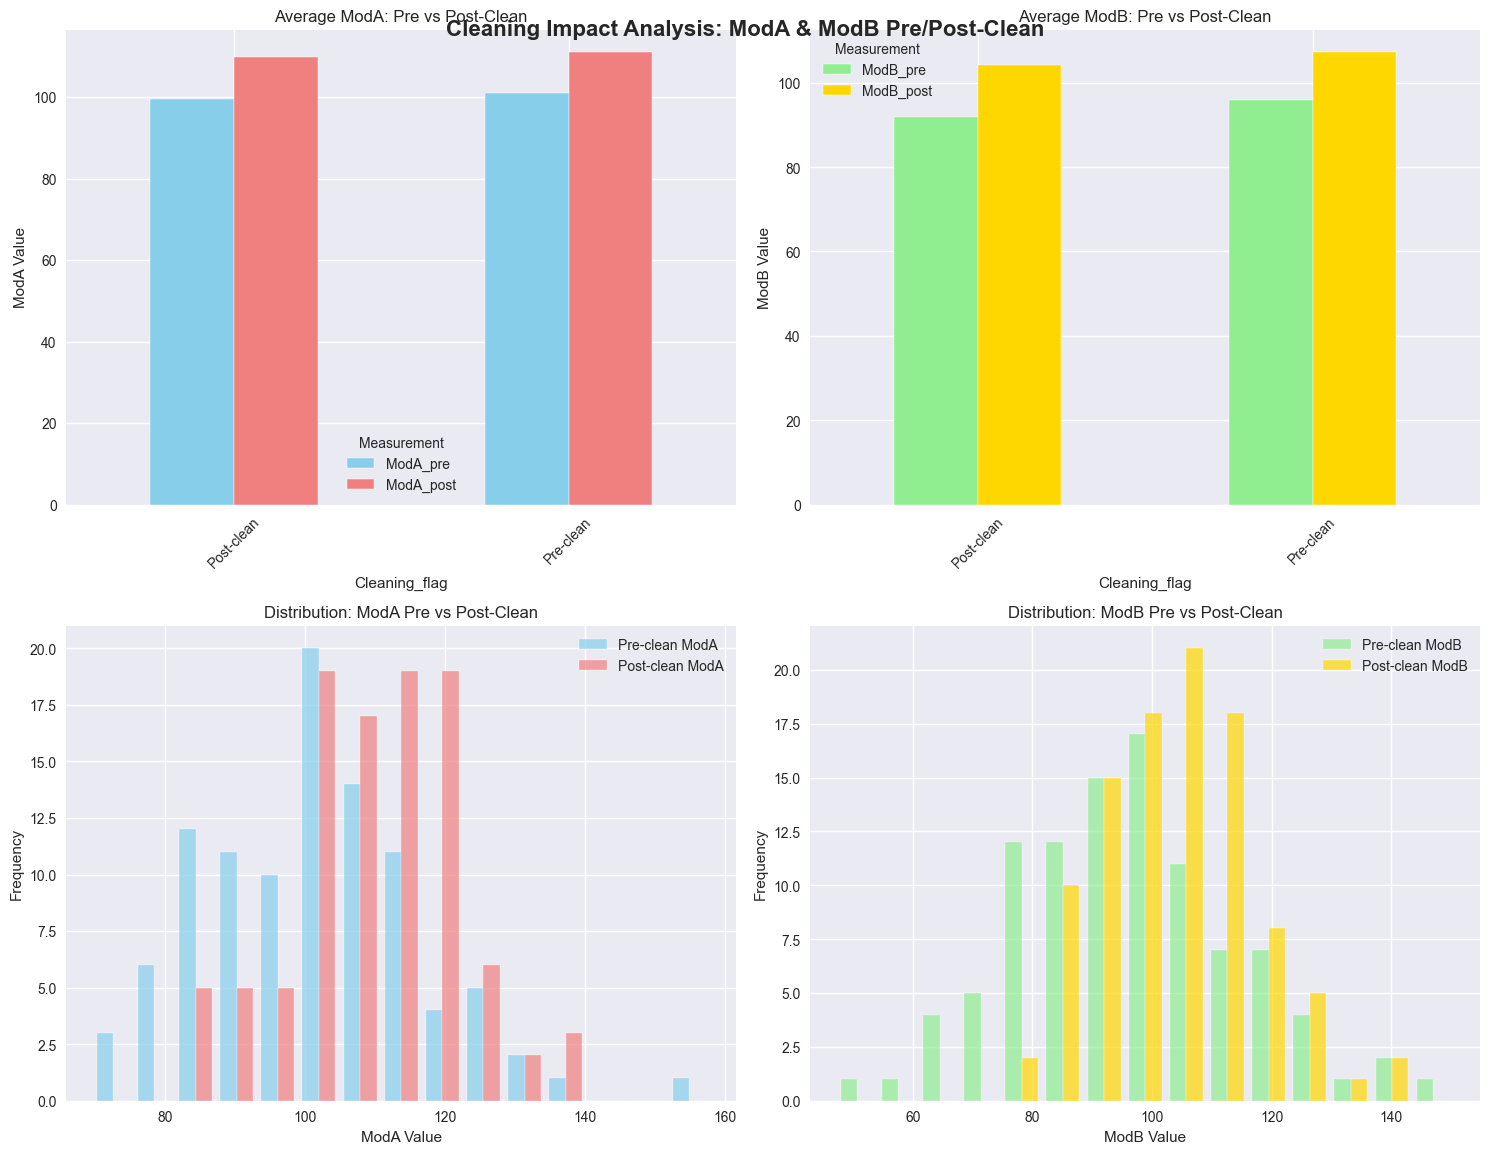

In [96]:

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
def load_and_prepare_data(path='../data/togo-dapaong_qc_clean.csv'):
   
    np.random.seed(42)
    n_samples = 200
    
    sample_data = {
        'Cleaning_flag': np.random.choice(['Pre-clean', 'Post-clean'], n_samples),
        'ModA_pre': np.random.normal(100, 15, n_samples),
        'ModA_post': np.random.normal(110, 12, n_samples),
        'ModB_pre': np.random.normal(95, 18, n_samples),
        'ModB_post': np.random.normal(105, 14, n_samples)
    }
    
    df = pd.DataFrame(sample_data)
    return df

def basic_eda_summary(df):
  
    print("=" * 50)
    print("BASIC DATA OVERVIEW")
    print("=" * 50)
    
    print(f"Dataset shape: {df.shape}")
    print("\nData types:")
    print(df.dtypes)
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    print("\nBasic statistics:")
    print(df.describe())

def cleaning_impact_analysis(df):
  
    print("\n" + "=" * 50)
    print("CLEANING IMPACT ANALYSIS")
    print("=" * 50)
    

    grouped_stats = df.groupby('Cleaning_flag').agg({
        'ModA_pre': ['mean', 'std', 'count'],
        'ModA_post': ['mean', 'std', 'count'],
        'ModB_pre': ['mean', 'std', 'count'],
        'ModB_post': ['mean', 'std', 'count']
    }).round(2)
    
    print("Average metrics by cleaning status:")
    print(grouped_stats)
    
    return grouped_stats

def plot_cleaning_impact(df):
 
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Cleaning Impact Analysis: ModA & ModB Pre/Post-Clean', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    # 1. Average ModA comparison
    moda_means = df.groupby('Cleaning_flag')[['ModA_pre', 'ModA_post']].mean()
    moda_means.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral'])
    axes[0,0].set_title('Average ModA: Pre vs Post-Clean')
    axes[0,0].set_ylabel('ModA Value')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].legend(title='Measurement')
    
    # 2. Average ModB comparison
    modb_means = df.groupby('Cleaning_flag')[['ModB_pre', 'ModB_post']].mean()
    modb_means.plot(kind='bar', ax=axes[0,1], color=['lightgreen', 'gold'])
    axes[0,1].set_title('Average ModB: Pre vs Post-Clean')
    axes[0,1].set_ylabel('ModB Value')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].legend(title='Measurement')
    
    # 3. Distribution comparison - ModA
    pre_clean_moda = df[df['Cleaning_flag'] == 'Pre-clean']['ModA_pre']
    post_clean_moda = df[df['Cleaning_flag'] == 'Post-clean']['ModA_post']
    
    axes[1,0].hist([pre_clean_moda, post_clean_moda], 
                   bins=15, alpha=0.7, 
                   label=['Pre-clean ModA', 'Post-clean ModA'],
                   color=['skyblue', 'lightcoral'])
    axes[1,0].set_title('Distribution: ModA Pre vs Post-Clean')
    axes[1,0].set_xlabel('ModA Value')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    
    # 4. Distribution comparison - ModB
    pre_clean_modb = df[df['Cleaning_flag'] == 'Pre-clean']['ModB_pre']
    post_clean_modb = df[df['Cleaning_flag'] == 'Post-clean']['ModB_post']
    
    axes[1,1].hist([pre_clean_modb, post_clean_modb], 
                   bins=15, alpha=0.7, 
                   label=['Pre-clean ModB', 'Post-clean ModB'],
                   color=['lightgreen', 'gold'])
    axes[1,1].set_title('Distribution: ModB Pre vs Post-Clean')
    axes[1,1].set_xlabel('ModB Value')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()

def statistical_tests(df):
 
    from scipy import stats
    
    print("\n" + "=" * 50)
    print("STATISTICAL SIGNIFICANCE TESTS")
    print("=" * 50)
    
    # Extract data for t-tests
    pre_clean_moda = df[df['Cleaning_flag'] == 'Pre-clean']['ModA_pre']
    post_clean_moda = df[df['Cleaning_flag'] == 'Post-clean']['ModA_post']
    
    pre_clean_modb = df[df['Cleaning_flag'] == 'Pre-clean']['ModB_pre']
    post_clean_modb = df[df['Cleaning_flag'] == 'Post-clean']['ModB_post']
    
    # T-test for ModA
    t_stat_moda, p_val_moda = stats.ttest_ind(pre_clean_moda, post_clean_moda)
    print(f"ModA T-test: t-statistic = {t_stat_moda:.3f}, p-value = {p_val_moda:.4f}")
    print(f"ModA difference significant: {p_val_moda < 0.05}")
    
    # T-test for ModB
    t_stat_modb, p_val_modb = stats.ttest_ind(pre_clean_modb, post_clean_modb)
    print(f"ModB T-test: t-statistic = {t_stat_modb:.3f}, p-value = {p_val_modb:.4f}")
    print(f"ModB difference significant: {p_val_modb < 0.05}")

def comprehensive_cleaning_eda(file_path):
   
    # Load data
    df = load_and_prepare_data('../data/togo-dapaong_qc_clean.csv')
    
    # Perform EDA
    basic_eda_summary(df)
    grouped_stats = cleaning_impact_analysis(df)
    statistical_tests(df)
    plot_cleaning_impact(df)
    
    return df, grouped_stats

# Execute the EDA
if __name__ == "__main__":
    # Replace with your actual file path
    file_path = "'../data/togo-dapaong_qc_clean.csv'"  
    
    df, stats = comprehensive_cleaning_eda('../data/togo-dapaong_qc_clean.csv')

Correlation & Relationship Analysis

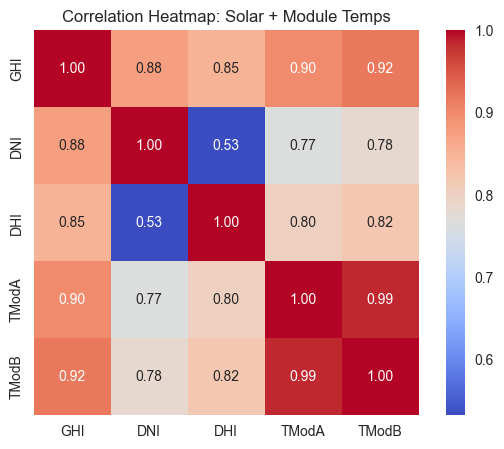

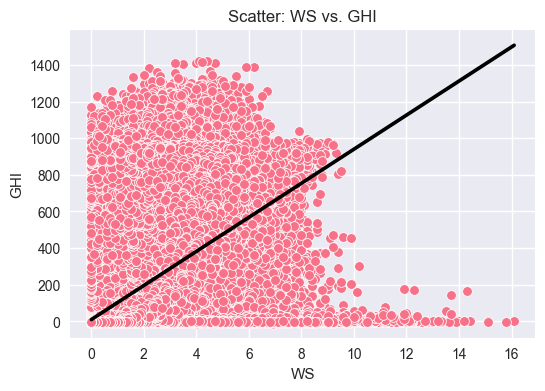

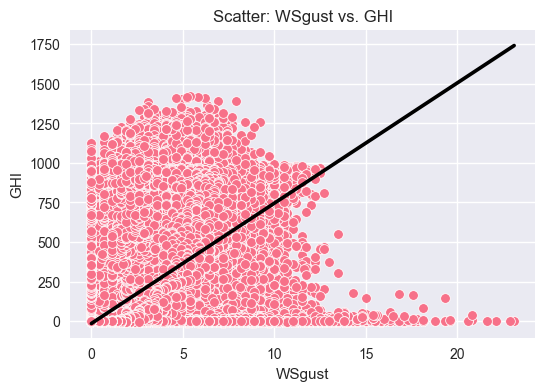

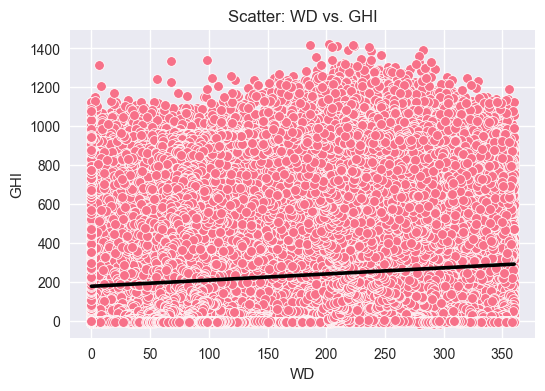

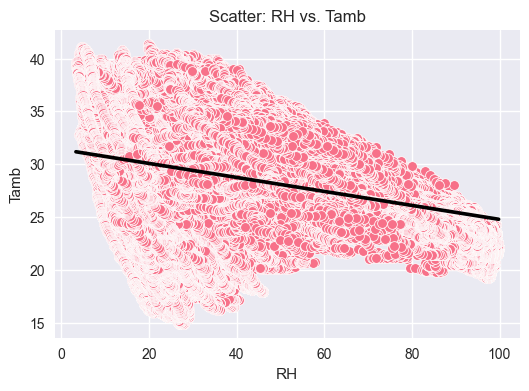

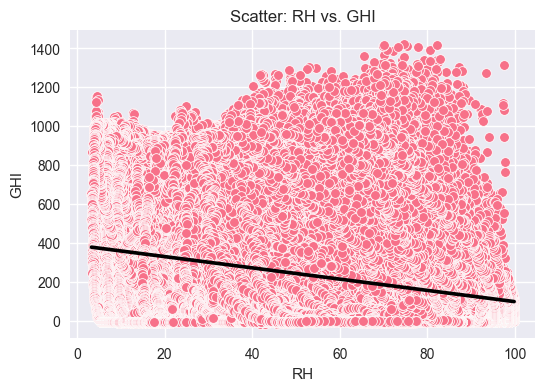

In [84]:
df = pd.read_csv("../data/togo-dapaong_qc_clean.csv")
corr_features = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True
)
plt.title("Correlation Heatmap: Solar + Module Temps")
plt.show()


scatter_pairs = [
    ("WS", "GHI"),
    ("WSgust", "GHI"),
    ("WD", "GHI"),
    ("RH", "Tamb"),
    ("RH", "GHI")
]

for x, y in scatter_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[x], y=df[y])
    sns.regplot(x=df[x], y=df[y], scatter=False, color="black")  # trendline
    plt.title(f"Scatter: {x} vs. {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


Correlation & Relationship Analysis

<Figure size 700x700 with 0 Axes>

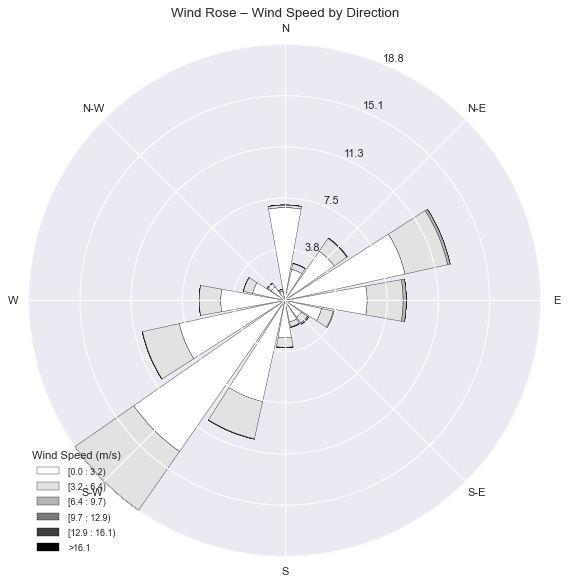

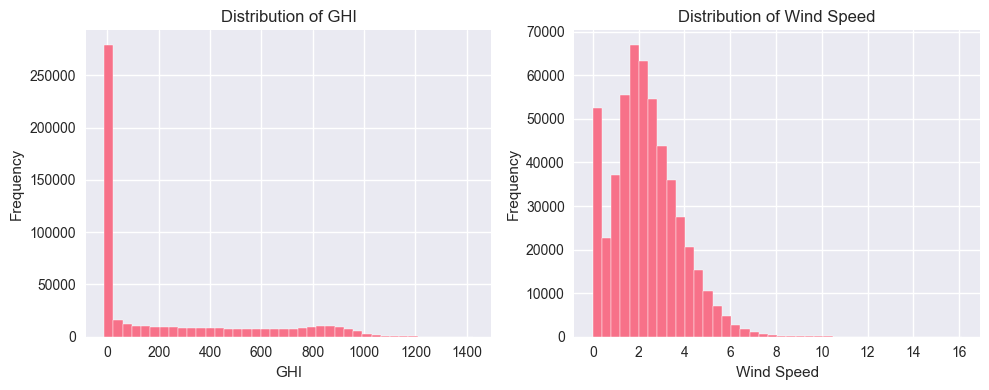

In [86]:


plt.figure(figsize=(7, 7))
ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.9, edgecolor="black")  # wind rose
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose – Wind Speed by Direction")
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df["GHI"].dropna(), bins=40)
axes[0].set_title("Distribution of GHI")
axes[0].set_xlabel("GHI")
axes[0].set_ylabel("Frequency")

axes[1].hist(df["WS"].dropna(), bins=40)
axes[1].set_title("Distribution of Wind Speed")
axes[1].set_xlabel("Wind Speed")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Temperature Analysis


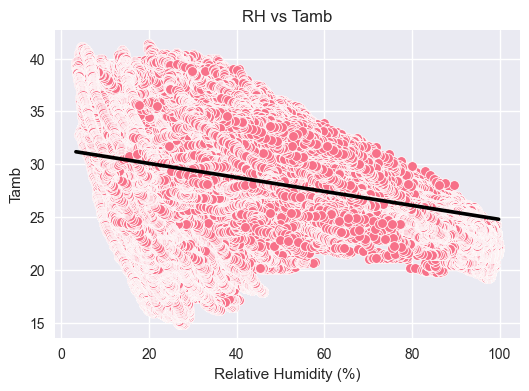

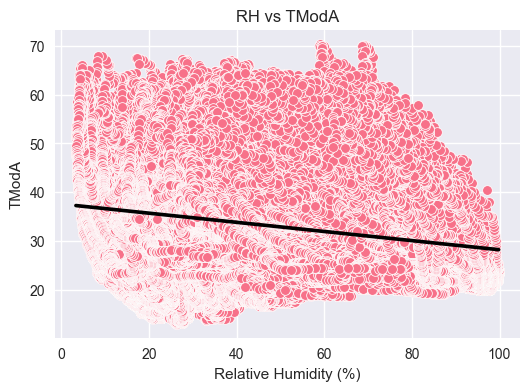

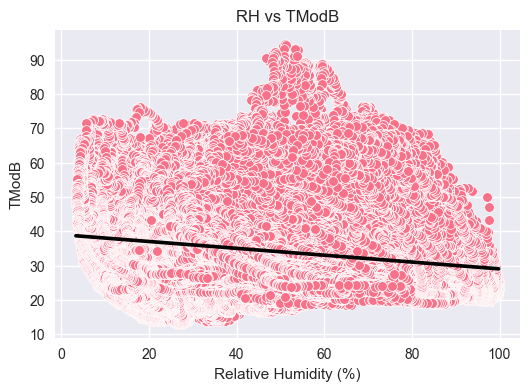

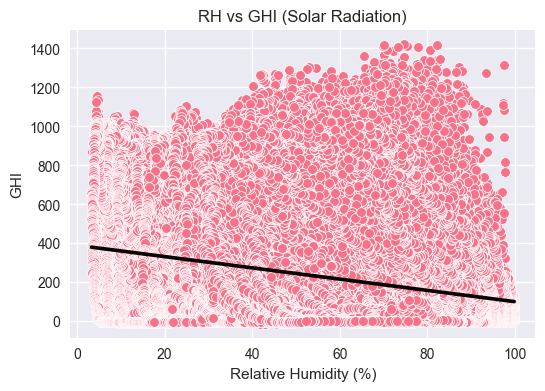

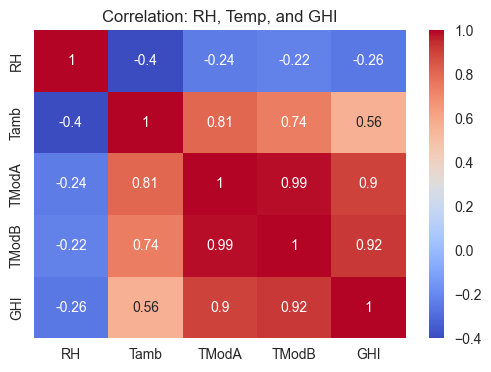

In [87]:

temp_vars = ["Tamb", "TModA", "TModB"]

for t in temp_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df["RH"], y=df[t])
    sns.regplot(x=df["RH"], y=df[t], scatter=False, color="black")
    plt.title(f"RH vs {t}")
    plt.xlabel("Relative Humidity (%)")
    plt.ylabel(t)
    plt.grid(True)
    plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["RH"], y=df["GHI"])
sns.regplot(x=df["RH"], y=df["GHI"], scatter=False, color="black")
plt.title("RH vs GHI (Solar Radiation)")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI")
plt.grid(True)
plt.show()


corr_vars = ["RH", "Tamb", "TModA", "TModB", "GHI"]
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation: RH, Temp, and GHI")
plt.show()


Bubble Chart


c:\Users\HP\Desktop\NEW_DEMO\Solar-Challenge-Week_0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


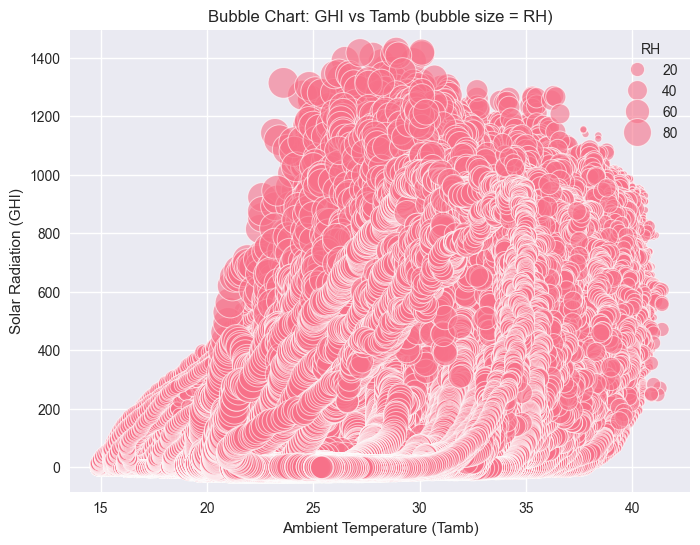

In [88]:

bubble_size_col = "RH"   

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Tamb"],
    y=df["GHI"],
    size=df[bubble_size_col],
    sizes=(20, 500),      
    alpha=0.6,            
    legend="brief"
)

plt.title(f"Bubble Chart: GHI vs Tamb (bubble size = {bubble_size_col})")
plt.xlabel("Ambient Temperature (Tamb)")
plt.ylabel("Solar Radiation (GHI)")
plt.grid(True)

plt.legend(title=bubble_size_col)
plt.show()


## Univariate Analysis

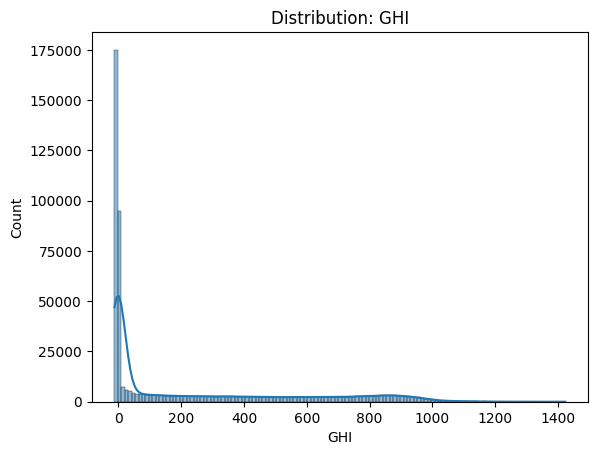

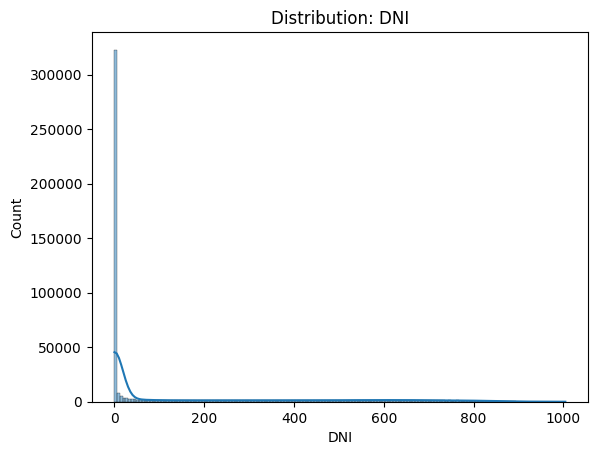

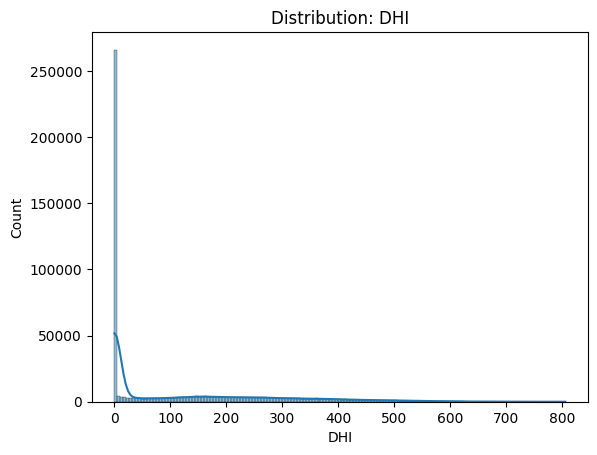

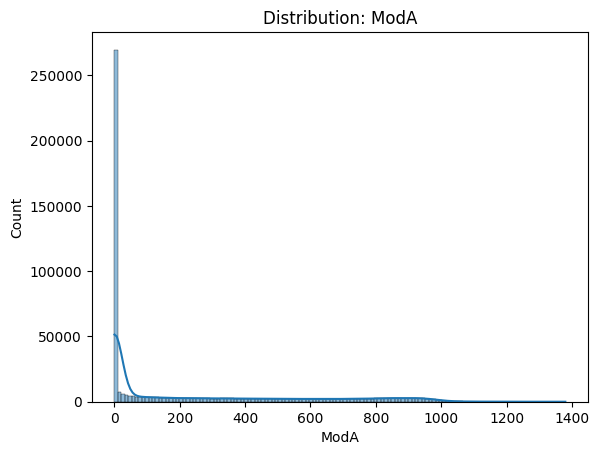

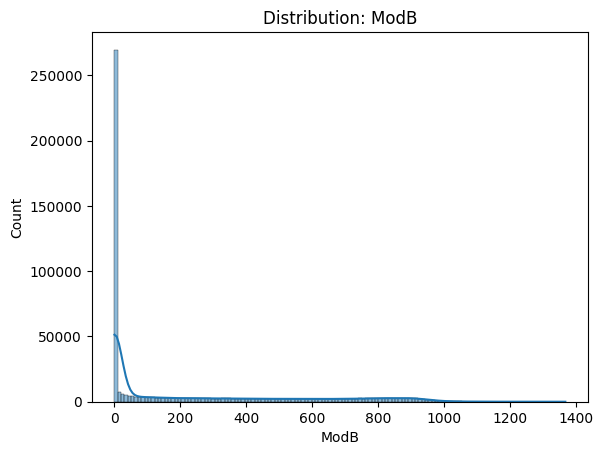

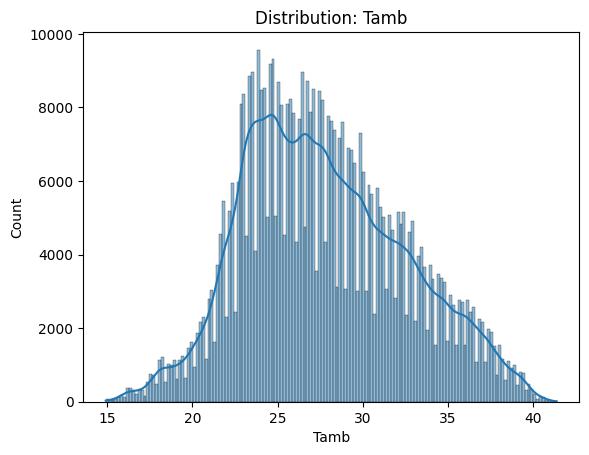

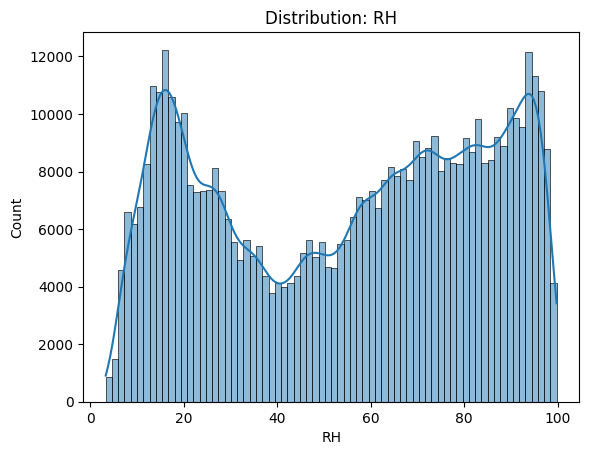

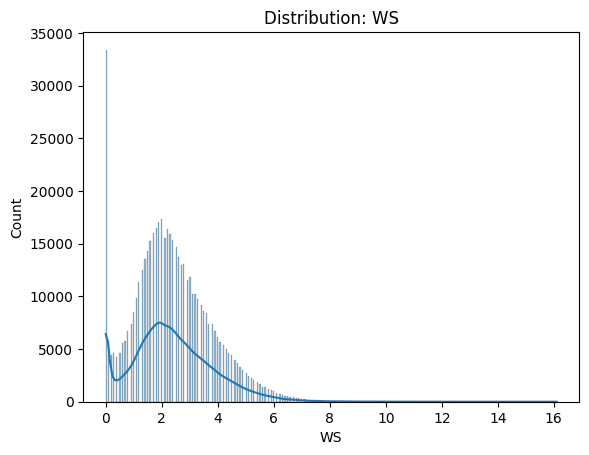

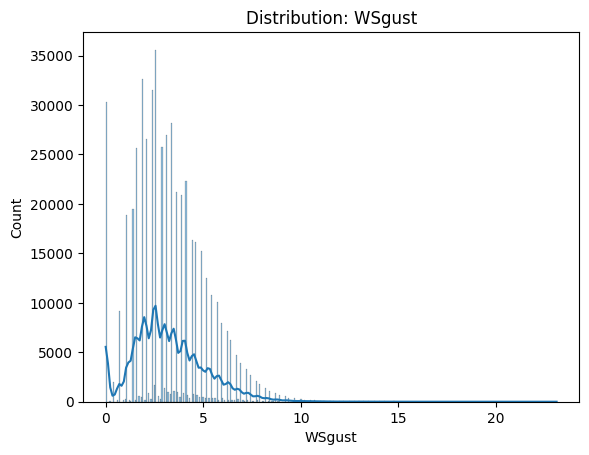

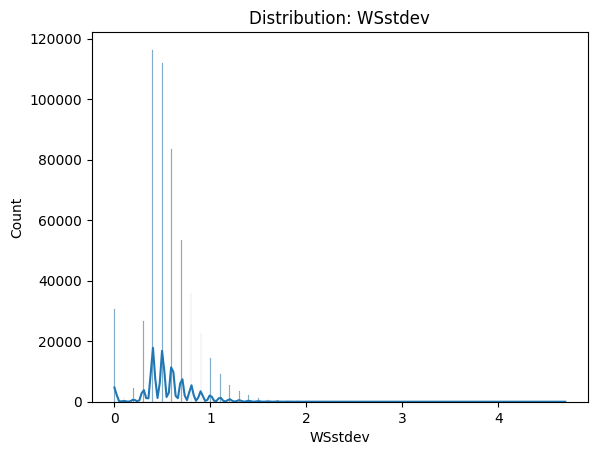

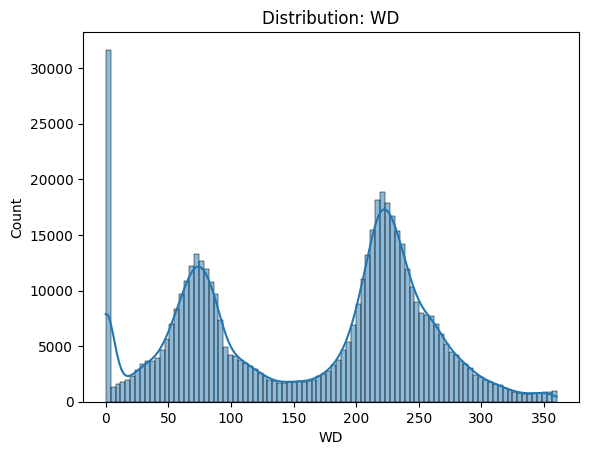

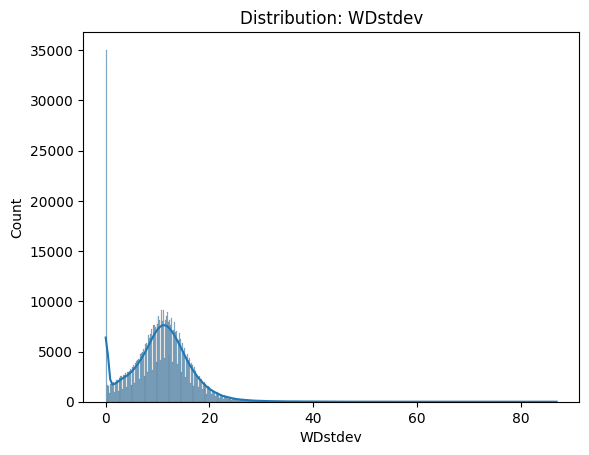

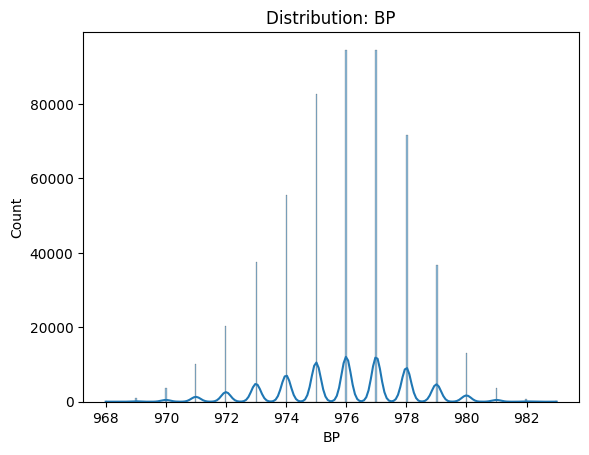

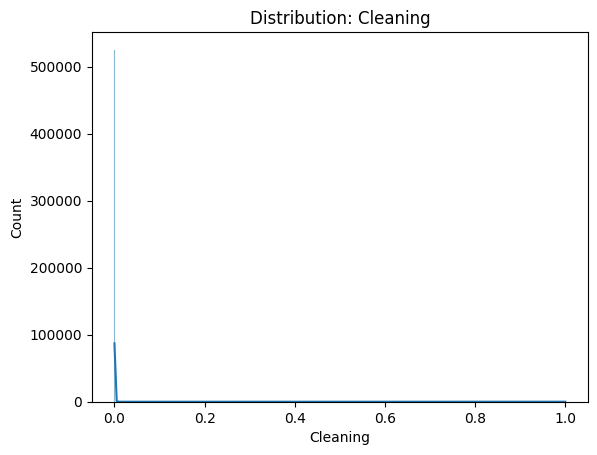

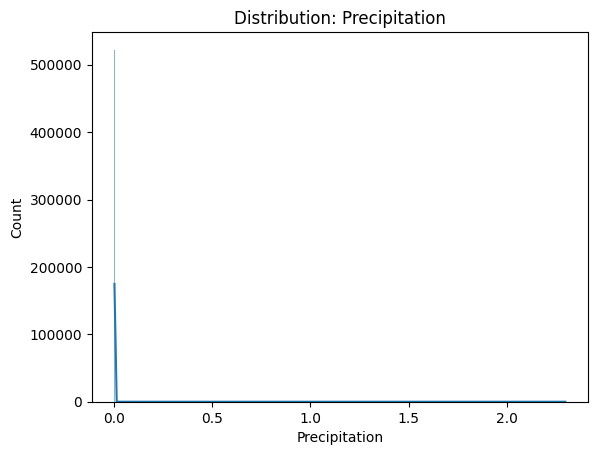

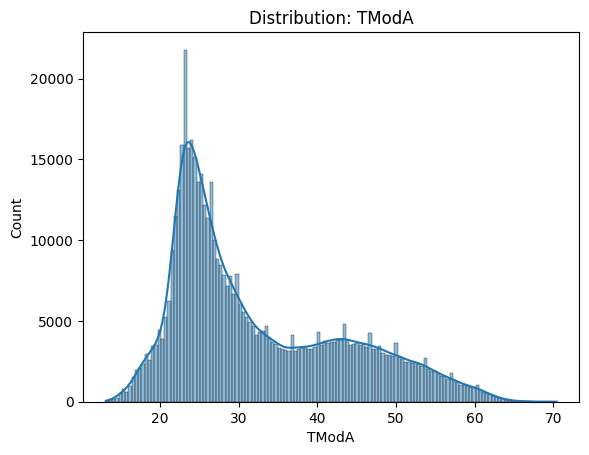

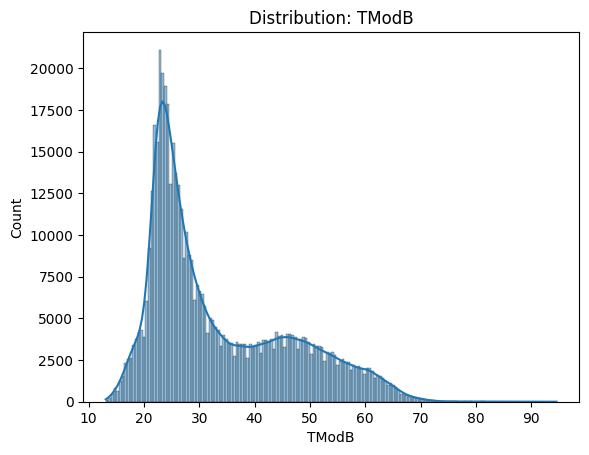

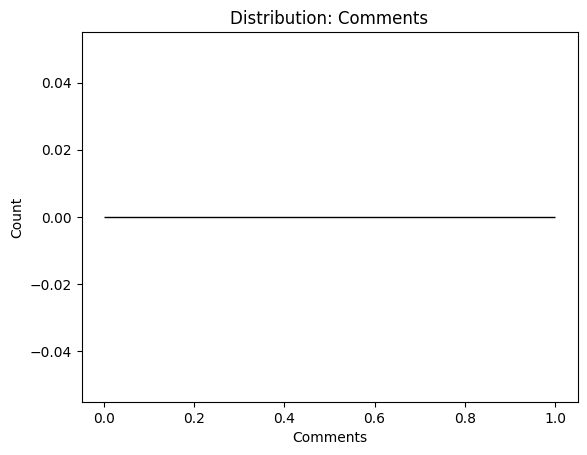

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


# Box Plots (numeric)

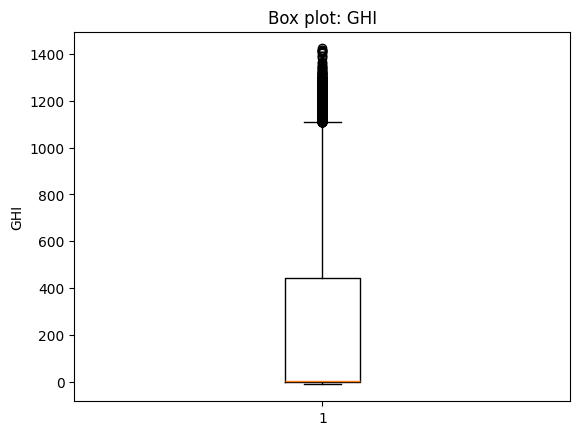

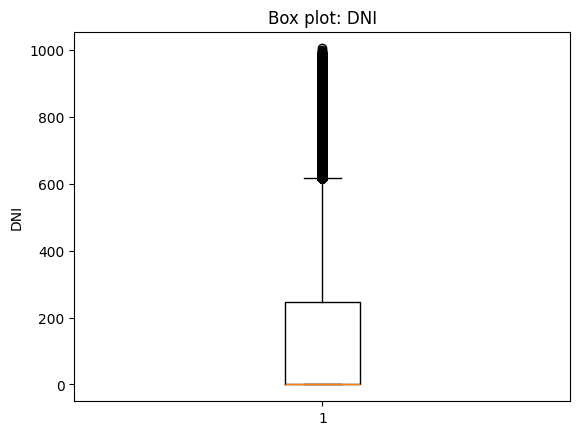

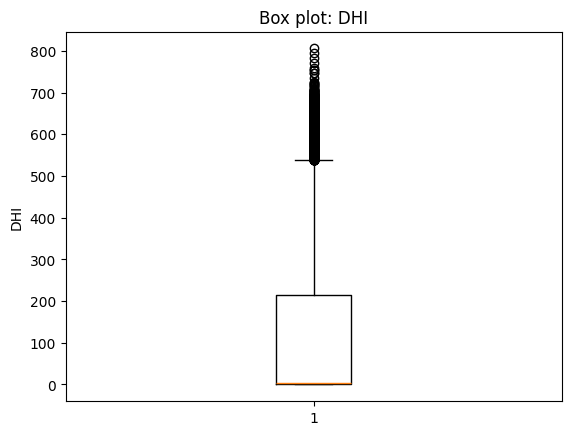

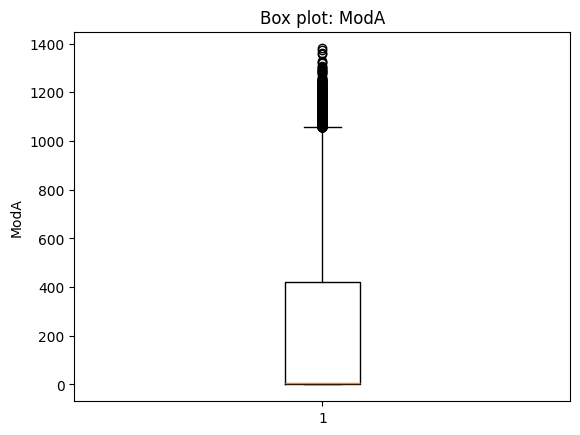

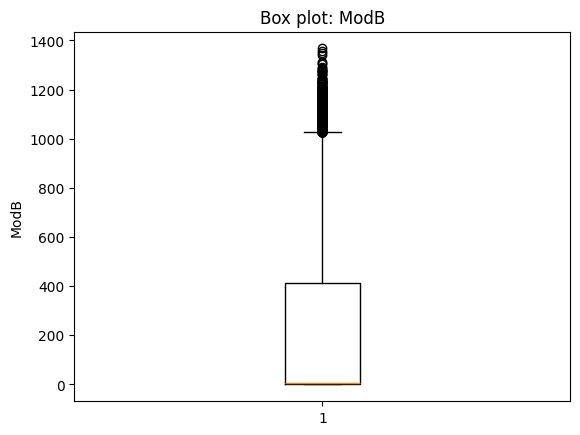

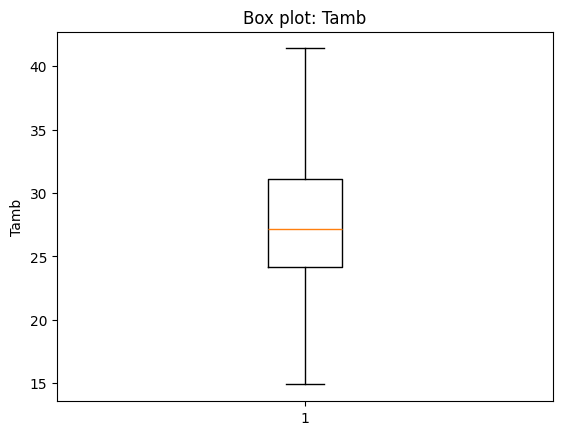

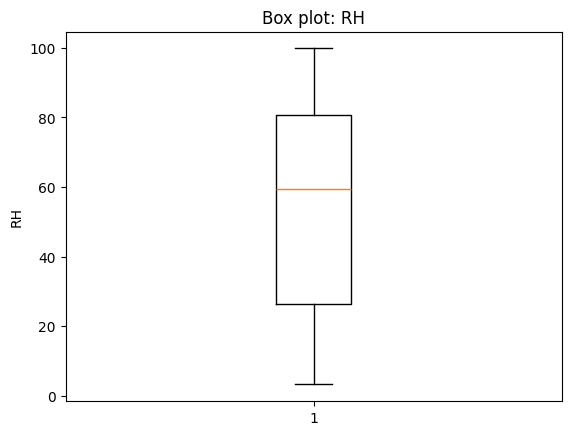

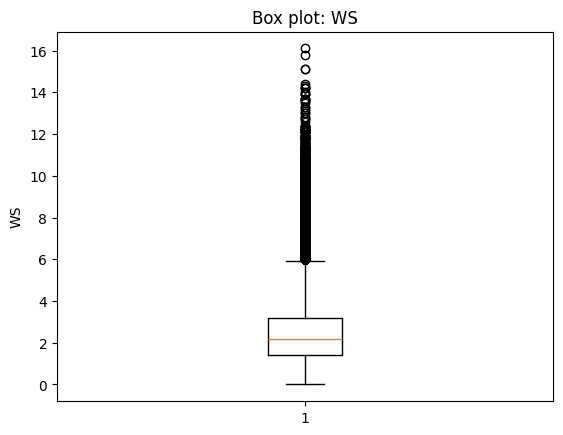

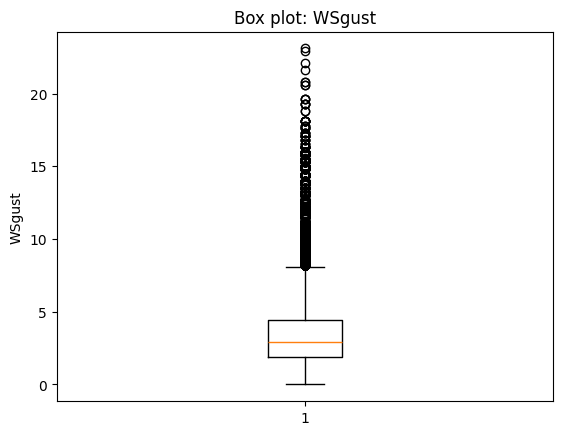

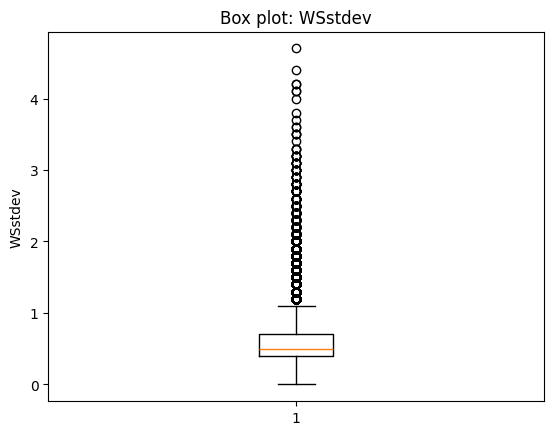

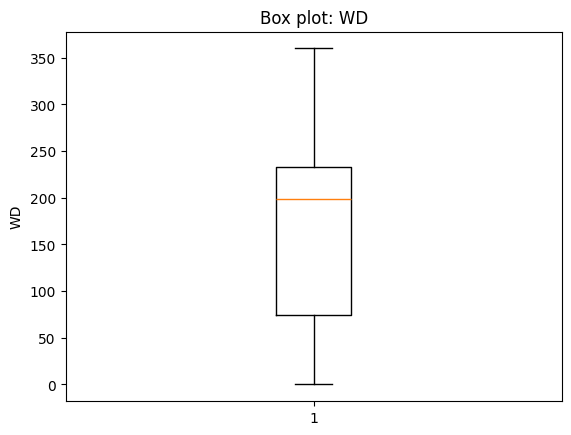

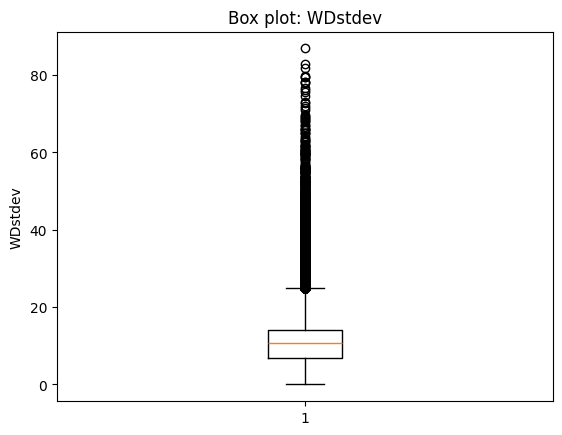

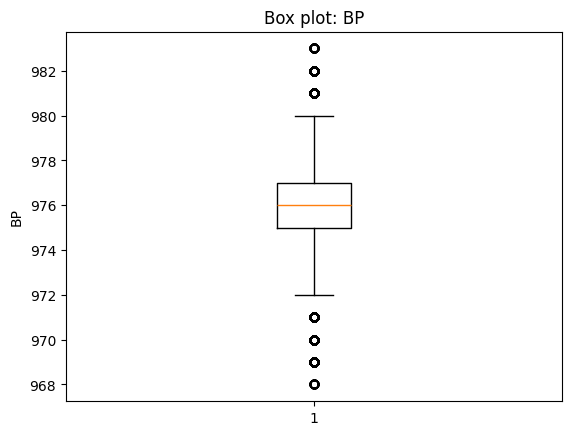

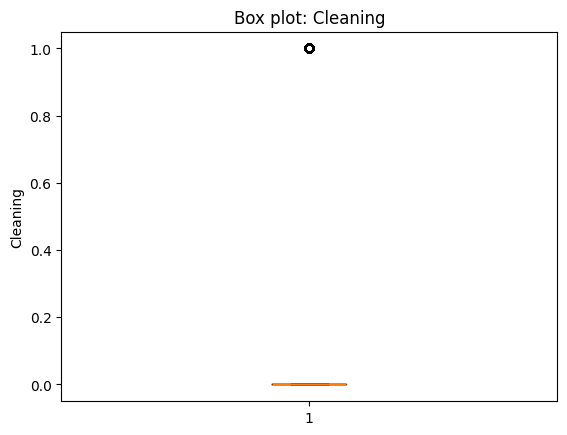

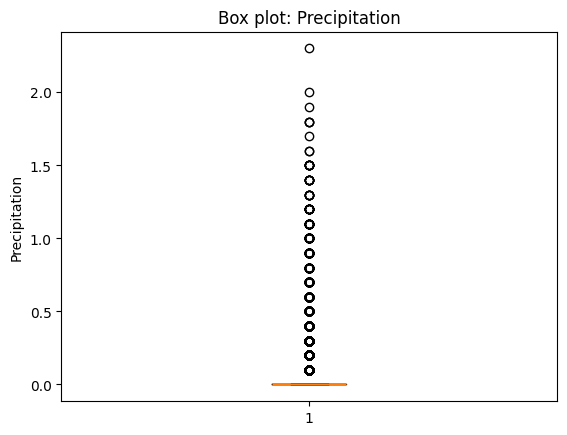

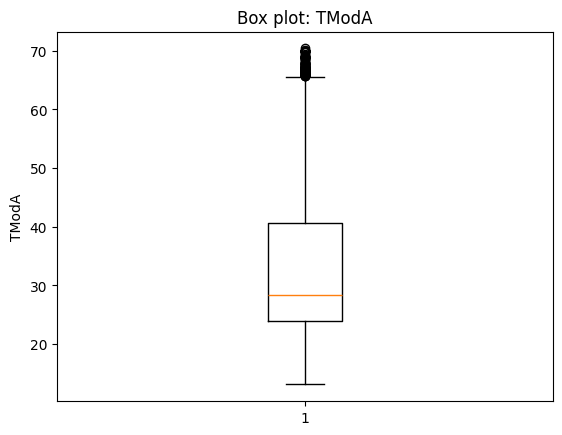

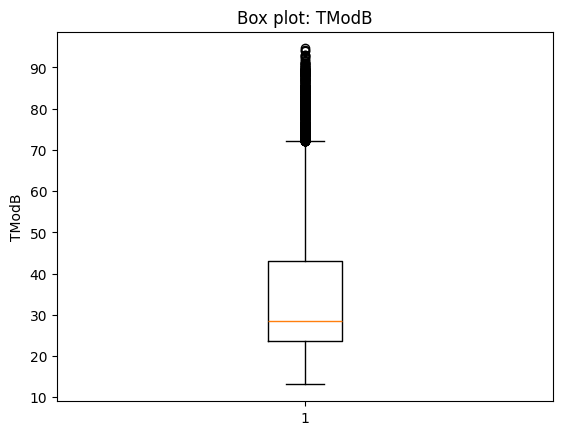

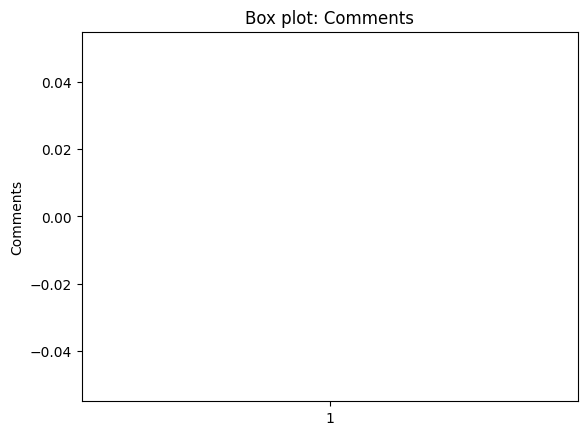

In [13]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()
